### Problem 8.1 Will the multiclass cross-entropy training loss in figure 8.2 ever reach zero? Explain your reasoning.

In theory, we can't get a perfect loss from the MCE criterion.  This is because we'd need the probability of our correct class to be 1 and the probability of all other classes to be 0.  We can never acheive this exactly as $\exp[z] > 0$  for all $z$, so, e.g., the denominator in the softmax for the correct class will always be some infinitesimally bit larger than the numerator.  In practice, given numerical precision, we can definitely get perfet training loss given an appropriately tuned learning algorithm

### Problem 8.2 What values should we choose for the three weights and biases in the first layer of the model in figure 8.4a so that the hidden unit’s responses are as depicted in figures 8.4b–d?

All three weights should be 1 so that the responses have unit slope. From earlier exercises, we have the joints as 

\begin{align}
    x^*_j &= \frac{-\beta_j}{\omega_j}
\end{align}

Since we have unit slopes, this means we want the biases to be 0, -1/3, and -2/3.

### Problem 8.3∗ Given a training dataset consisting of I input/output pairs {xi , yi }, show how the parameters {β, ω1 , ω2 , ω3 } for the model in figure 8.4a using the least squares loss function can be found in closed form.

\begin{align}
    L[\phi] &= \sum_i^{I}(\beta + \omega_1h_1[x_i] + \omega_2h_2[x_i] + \omega_3h_3[x_i] - y_i)^2
\end{align}

Which is just a linear regression in the basis of of our hidden units. So

\begin{align}
    \frac{\partial L[\phi]}{\partial \beta} &= 2\sum_i^{I}(\beta + \omega_1h_1[x_i] + \omega_2h_2[x_i] + \omega_3h_3[x_i] - y_i) \\
    \frac{\partial L[\phi]}{\partial \omega_j} &= 2\sum_i^{I}(\beta + \omega_1h_1[x_i] + \omega_2h_2[x_i] + \omega_3h_3[x_i] - y_i)h_j[x_i] \\
\end{align}

We can set these to 0 and obtain the normal closed form solution:

\begin{align}
    \phi &= (H^TH)^{-1}H^Ty
\end{align}

Where $H$ is a 4 x I matrix where the i-th row has values $[1, h_1[x_i], h_2[x_i], h_3[x_i]]$



### Problem 8.4 Consider the curve in figure 8.10b at the point where we train a model with a hidden layer of size 200, which would have 50,410 parameters. What do you predict will happen to the training and test performance if we increase the number of training examples from 10,000 to 50,410?

Training performance will have a similar descent, but the error would hit zero later as it has more data to memorize.  The train curve would also get stretched out and have a maximum at the new spot where the training set size equals the number of parameters.  However, both on its first and second descent, it should hit a lower train error minimum, as adding more data should reduce the model variance.

### Problem 8.5 Consider the case where the model capacity exceeds the number of training data points, and the model is flexible enough to reduce the training loss to zero. What are the implications of this for fitting a heteroscedastic model? Propose a method to resolve any problems that you identify.

Our model will end up having more confidence than it should in high variance regimes and less confidence than it should in low variance regimes.  The thing to do is to try to model the noise directly as a function of where we think the heteroscedasticity is.

### Problem 8.6 Show that two random points drawn from a 1000-dimensional standard Gaussian distribution are orthogonal relative to the origin with high probability.

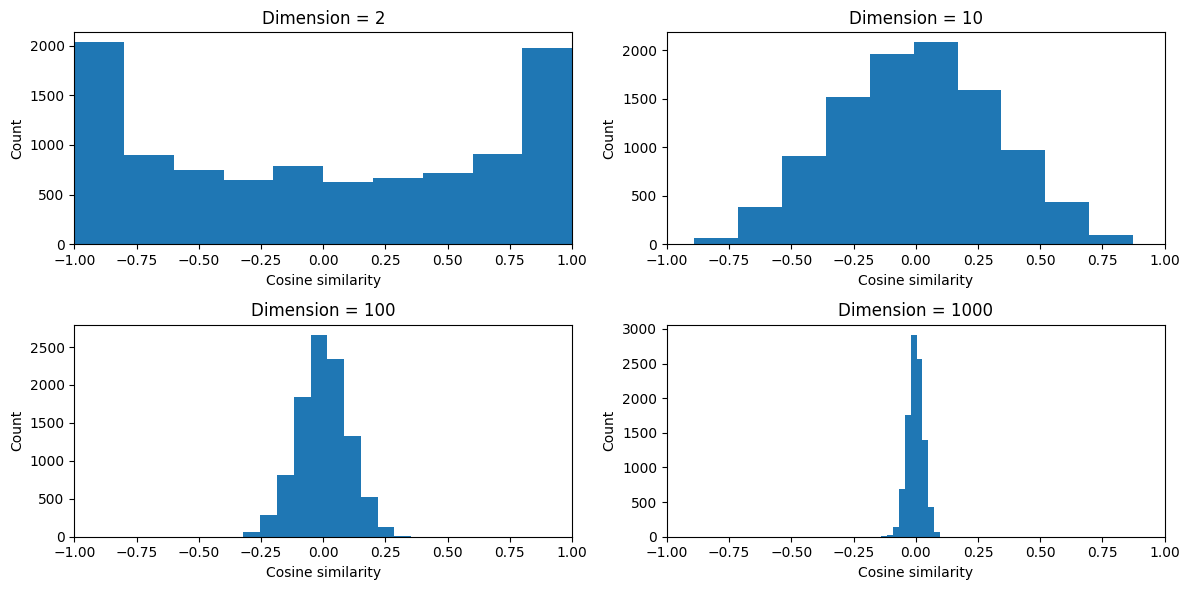

In [19]:
import numpy as np
import matplotlib.pyplot as plt


dims = [2, 10, 100, 1000]

fig, axes= plt.subplots(figsize=(12, 6), nrows=2, ncols=2)

for ax, dim in zip(axes.flatten(), dims):
    samples = 100
    
    scores = np.zeros((samples, samples))
    data = np.random.normal(size=(samples, dim))
    
    for i in range(samples):        
        for j in range(i):
            v1 = data[i]
            v2 = data[j]
            # Cosine similarity - the angle between the vectors
            score = np.dot(v1, v2)/(np.linalg.norm(v1) * np.linalg.norm(v2))
            scores[i, j] = score
            scores[j, i] = score
    
    ax.hist(scores.flatten())
    ax.set_title(f'Dimension = {dim}')
    ax.set_xlim((-1, 1))
    ax.set_xlabel('Cosine similarity')
    ax.set_ylabel('Count')

fig.tight_layout()


### Problem 8.7 The volume of a hypersphere with radius r in D dimensions is: Vol[r] = rD π D/2, Γ[D/2 + 1] (8.8) where Γ[•] is the Gamma function. Show using Stirling’s formula that the volume of a hyper-sphere of diameter one (radius r = 0.5) becomes zero as the dimension increases.

\begin{align}
    Vol[r] &= \frac{r^D \pi^{D/2}}{\Gamma[D/2 + 1]} \\
    &\approx \frac{r^D \pi^{D/2}}{\sqrt{\pi D}\frac{D}{e}^D} \\
    &= \frac{\left(\frac{e\sqrt{\pi}}{2}\right)^D}{\sqrt{\pi D}D^D} \\
    &\le \left(\frac{e\sqrt{\pi}}{2D}\right)^D
\end{align}
Which is easy to see vanishes as D gets large

### Problem 8.8∗ Consider a hypersphere of radius r = 1. Find an expression for the proportion of the total volume that lies in the outermost 1% of the distance from the center (i.e., in the outermost shell of thickness 0.01). Show that this becomes one as the dimension increases.

Skipping the algebra.  I know this is the case.

### Problem 8.9 Figure 8.13c shows the distribution of distances of samples of a standard normal distribution as the dimension increases. Empirically verify this finding by sampling from the standard normal distributions in 25, 100, and 500 dimensions and plotting a histogram of the distances from the center. What closed-form probability distribution describes these distances?

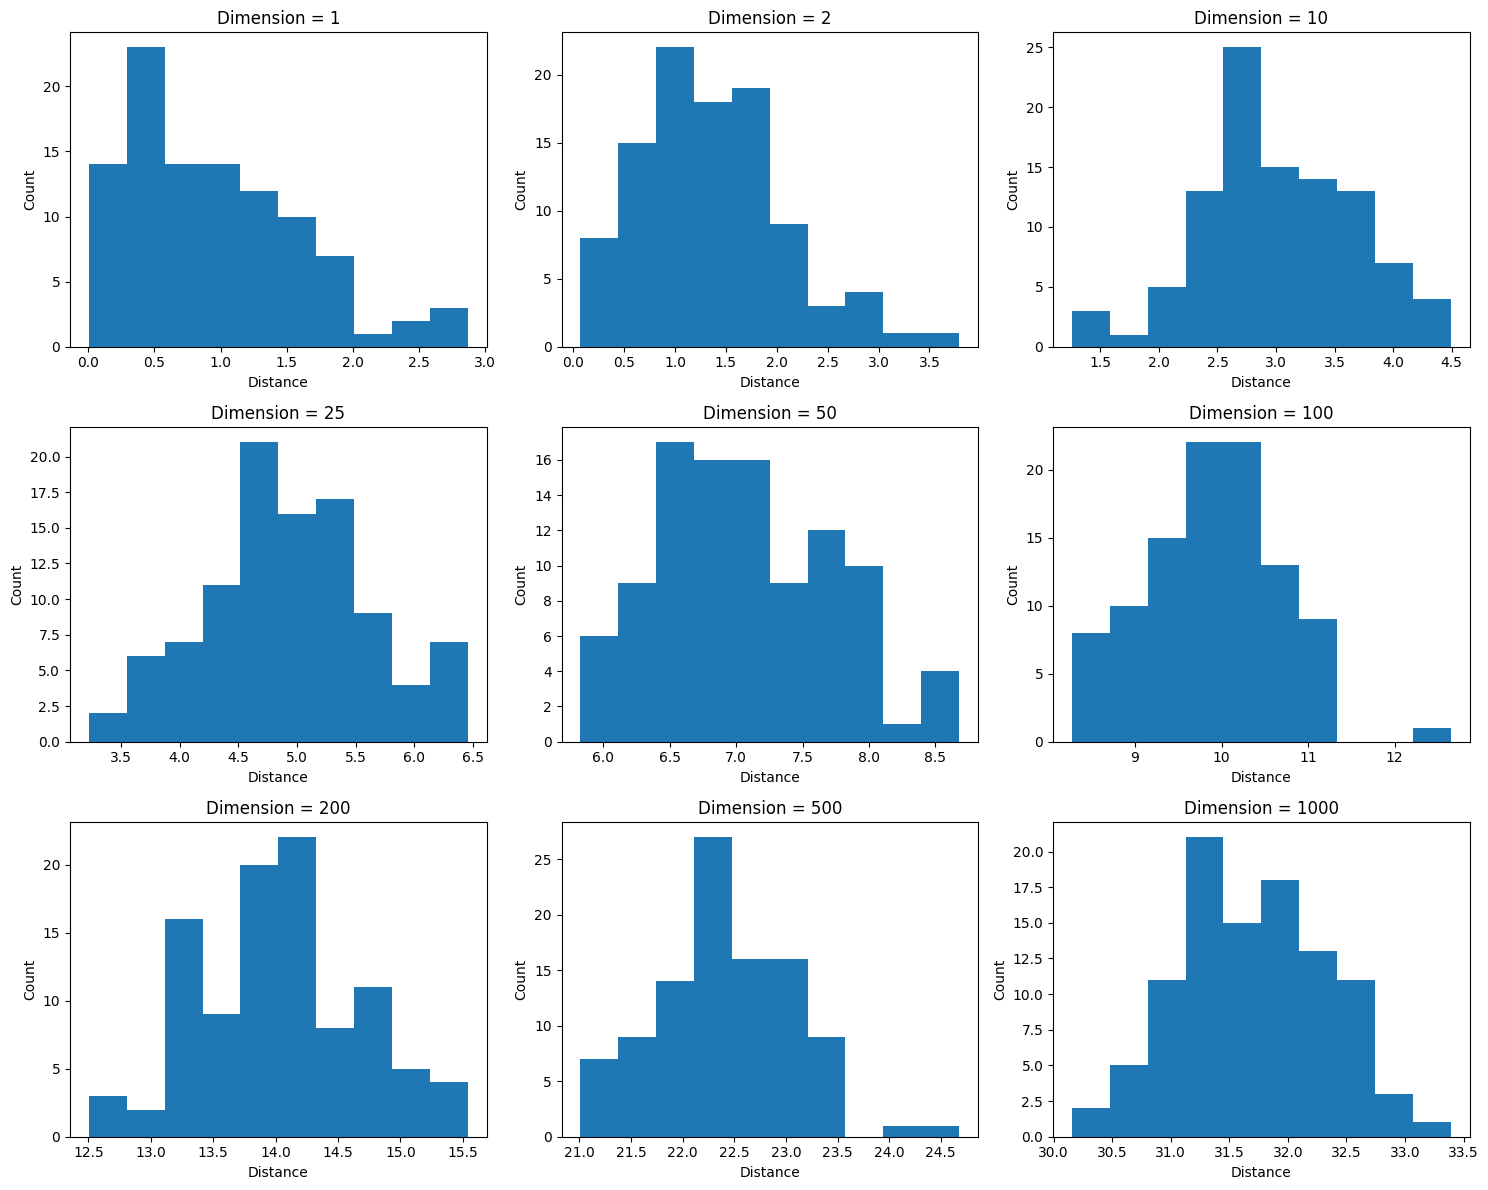

In [21]:
import numpy as np
import matplotlib.pyplot as plt

samples = 100    
dims = [1, 2, 10, 25, 50, 100, 200, 500, 1000]
fig, axes = plt.subplots(figsize=(15, 12), nrows=3, ncols=3)
for ax, dim in zip(axes.flatten(), dims):    
    data = np.random.normal(size=(samples, dim))
    distances = np.linalg.norm(data, axis=1)

    
    ax.hist(distances)
    ax.set_title(f'Dimension = {dim}')    
    ax.set_xlabel('Distance')
    ax.set_ylabel('Count')

fig.tight_layout()